# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
np.random.seed(123)
with open("/Users/data_lab_LM/simple_data.txt", 'w') as file:   #WINDOWS
#with open("/home/francescofontana/data/simple_data.txt", 'w') as file: #LINUX

        file.write(str(np.random.rand(10)))

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
with open ("/Users/data_lab_LM/data.txt" , 'w') as dt:  #WINDOWS
#with open ("/home/francescofontana/data/data.txt" , 'w') as dt:   #LINUX
    
    np.random.seed(123)
    x=np.random.rand(25)
    x=x.reshape(5,5)
    
    z=str(x).replace('[','').replace(']','') # To remove the parentesis that cause problem on reading after
    print(z)
    dt.write(z)


0.69646919 0.28613933 0.22685145 0.55131477 0.71946897
 0.42310646 0.9807642  0.68482974 0.4809319  0.39211752
 0.34317802 0.72904971 0.43857224 0.0596779  0.39804426
 0.73799541 0.18249173 0.17545176 0.53155137 0.53182759
 0.63440096 0.84943179 0.72445532 0.61102351 0.72244338


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [4]:
with open ("/Users/data_lab_LM/data.txt" , 'r') as dtr:  #WINDOWS
#with open ("/home/francescofontana/data/data.txt" , 'r') as dtr:   #LINUX

    data=np.loadtxt(dtr)
    tmp=data.tolist()
    
    with open ("/Users/data_lab_LM/data.csv",'w') as csvv:  #WINDOWS
    #with open ("/home/francescofontana/data/data.csv",'w') as csvv:  #LINUX
        for i in tmp:
            csvv.write(str(i).replace('[','').replace(']','') +'\n')


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [5]:
with open ("credit_card.dat" , 'r') as cc:
    #(6 bit) every number [x4], (6 bit) every space [x3], last 4 bit padding
    
    ccard=np.empty((0,16),int)
    for line in cc:
        word_counter=0
        word_size = 6
        cc_linel=[]
        if len(line)>118: # to be sure to not compute line without at least 118bit
            for i in range(0, len(line),word_size):
                word_counter+=1
            
                if word_counter%5 != 0:
                    numb=chr(int('0b'+ str(line[i:word_size*word_counter]),2))
                
                    cc_linel.append(int(numb))
            
            linecc=np.array(cc_linel).reshape(1,16)

            ccard=np.append(ccard, linecc,axis=0)
    
    for i in range (ccard.shape[0]):
        print('%i Credit card: --->'%(i+1),ccard[i,:])

1 Credit card: ---> [7 6 4 8 5 6 7 3 3 7 7 5 2 2 7 1]
2 Credit card: ---> [3 2 5 7 8 2 4 7 3 3 5 4 2 2 6 6]
3 Credit card: ---> [2 7 2 2 0 0 0 1 4 0 1 1 6 6 5 2]
4 Credit card: ---> [0 6 6 1 3 0 6 3 3 7 4 2 3 1 5 0]
5 Credit card: ---> [0 4 3 2 1 6 0 8 1 4 6 2 4 7 4 2]
6 Credit card: ---> [5 8 2 7 2 0 2 7 8 7 8 5 7 3 0 3]
7 Credit card: ---> [5 7 7 4 8 5 2 8 2 0 8 7 1 1 1 7]
8 Credit card: ---> [8 1 4 0 1 2 1 0 6 3 5 2 2 8 4 5]
9 Credit card: ---> [5 7 6 4 1 1 3 3 7 3 0 1 7 1 0 0]
10 Credit card: ---> [6 4 5 6 1 7 3 7 4 1 2 6 6 7 2 6]
11 Credit card: ---> [1 2 2 8 8 6 3 1 7 3 8 2 0 0 0 0]
12 Credit card: ---> [7 0 5 1 0 1 6 0 5 3 7 4 3 1 6 6]
13 Credit card: ---> [0 6 1 8 3 5 8 7 1 6 3 0 6 3 7 6]
14 Credit card: ---> [1 5 4 5 5 4 5 4 7 4 4 4 5 6 3 6]
15 Credit card: ---> [6 7 3 5 3 1 1 6 3 2 0 2 6 8 3 4]
16 Credit card: ---> [7 2 8 7 5 0 1 1 1 5 4 7 8 4 1 3]
17 Credit card: ---> [7 0 3 3 2 6 0 7 3 3 2 8 4 2 0 0]
18 Credit card: ---> [2 5 6 8 5 2 4 4 1 8 7 4 5 0 2 4]
19 Credit card: ---

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [6]:
import json
import csv

with open('/Users/data_lab_LM/user_data.csv', 'w') as filecsv:  #WINDOWS
#with open('/home/francescofontana/data/user_data.csv', 'w') as filecsv:  #LINUX
    
    lis=["ID","JobTitle", "EmailAddress", "CreditCard","CreditCardType"]
    
    filecsv.write(str(lis)+'\n')

    data = json.load(open('user_data.json'))

    filt_cc = 'American Express'
    counter=0
    
    for i in range(len(data)):
        IDs=data[i][lis[0]]
        JT=data[i][lis[1]]
        EA=data[i][lis[2]]
        CC=data[i][lis[3]]
        CCT=data[i][lis[4]]
    
        if CCT==filt_cc:
            counter+=1
            lis_filtered=[IDs,JT,EA,CC,CCT]
            filecsv.write(str(lis_filtered).replace('[','').replace(']','\n').replace("'",''))
            
    print("There are %i people that have [credit card = 'American Express'] and their full contact informations\nare available also on 'user_data.csv':"%counter)

with open('/Users/data_lab_LM/user_data.csv', 'r') as filecsv:    #WINDOWS
#with open('/home/francescofontana/data/user_data.csv', 'r') as filecsv:  #LINUX
    print('\n',filecsv.read())

        
        

There are 20 people that have [credit card = 'American Express'] and their full contact informations
are available also on 'user_data.csv':

 ['ID', 'JobTitle', 'EmailAddress', 'CreditCard', 'CreditCardType']
2, Investment  Advisor, Clint_Thorpe5003@bulaffy.com, 7083-8766-0251-2345, American Express
12, Retail Trainee, Phillip_Carpenter9505@famism.biz, 3657-0088-0820-5247, American Express
28, Project Manager, Russel_Graves1378@extex.org, 6718-4818-8011-6024, American Express
39, Stockbroker, Leanne_Newton1268@typill.biz, 5438-0816-4166-4847, American Express
57, Budget Analyst, Tony_Giles1960@iatim.tech, 8130-3425-7573-7745, American Express
62, CNC Operator, Owen_Allcott5125@bauros.biz, 4156-0107-7210-2630, American Express
68, Project Manager, Liam_Lynn3280@kideod.biz, 7152-3247-6053-2233, American Express
74, Dentist, Regina_Woodcock5820@yahoo.com, 0208-1753-3870-8002, American Express
81, HR Specialist, Carter_Wallace9614@atink.com, 4256-7201-6717-4322, American Express
92, Staffi

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe what you see


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

Text(0.5, 1.0, 'Distribution of class ')

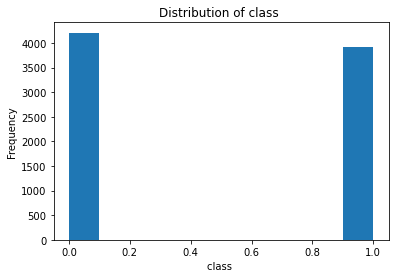

In [7]:
#!wget https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1 -P ~/data/  #LINUX

import pandas as pd
import matplotlib.pyplot as plt

file_name="/Users/data_lab_LM/mushrooms_categorized.csv"    #WINDOWS
#file_name="/home/francescofontana/data/mushrooms_categorized.csv?dl=1"  #LINUX
data=pd.read_csv(file_name,nrows=8125,skiprows=range(1,1))


data.info()

data 

data['class'].plot(kind='hist')
plt.xlabel("class ")
plt.ylabel("Frequency")
plt.title("Distribution of class ")


7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        2000 non-null   float64
 1   features_1   2000 non-null   float64
 2   features_2   2000 non-null   float64
 3   features_3   2000 non-null   float64
 4   features_4   2000 non-null   float64
 5   features_5   2000 non-null   float64
 6   features_6   2000 non-null   float64
 7   features_7   2000 non-null   float64
 8   features_8   2000 non-null   float64
 9   features_9   2000 non-null   float64
 10  features_10  2000 non-null   float64
 11  features_11  2000 non-null   float64
 12  features_12  2000 non-null   float64
 13  features_13  2000 non-null   float64
 14  features_14  2000 non-null   float64
 15  features_15  2000 non-null   float64
 16  features_16  2000 non-null   float64
 17  features_17  2000 non-null   float64
 18  features_18  2000 non-null   float64
 19  featur

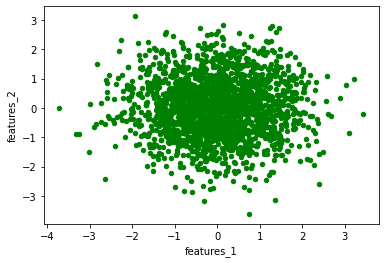

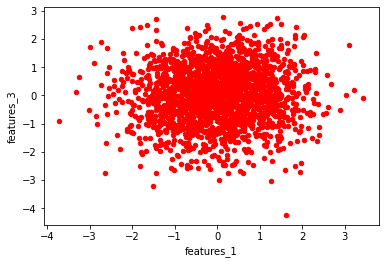

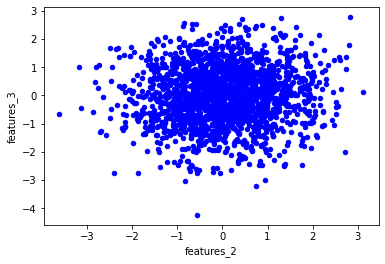

In [8]:
#!wget https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1 -P ~/data/  #LINUX
    
import pandas as pd
import matplotlib.pyplot as plt

file_name="/Users/data_lab_LM/regression_generated.csv"   #WINDOWS
#file_name="/home/francescofontana/data/regression_generated.csv?dl=1"   #LINUX

data = pd.read_csv(file_name)

data.info()

data

data.plot(kind='scatter',x = 'features_1', y = 'features_2', color='green')
data.plot(kind='scatter',x = 'features_1', y = 'features_3',color='red')
data.plot(kind='scatter',x = 'features_2', y = 'features_3',color='blue')    

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [9]:
import pandas as pd

file_name="/Users/data_lab_LM/mushrooms_categorized.csv"  #WINDOWS
#file_name="/home/francescofontana/data/mushrooms_categorized.csv?dl=1"  #LINUX

data = pd.read_csv(file_name)

data.to_json('/Users/data_lab_LM/mushrooms_categorized.json')   #WINDOWS
#data.to_json('/home/francescofontana/data/mushrooms_categorized.json')  #LINUX

pd.read_json('/Users/data_lab_LM/mushrooms_categorized.json')   #WINDOWS
#pd.read_json('/home/francescofontana/data/mushrooms_categorized.json')  #LINUX

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
